Verificando/Criando pasta de destino: Imagens_Transformadas

Encontradas 4 imagens da classe 'chave'.
Iniciando transformações...

Resultados para: chave_i_d_01.jpg


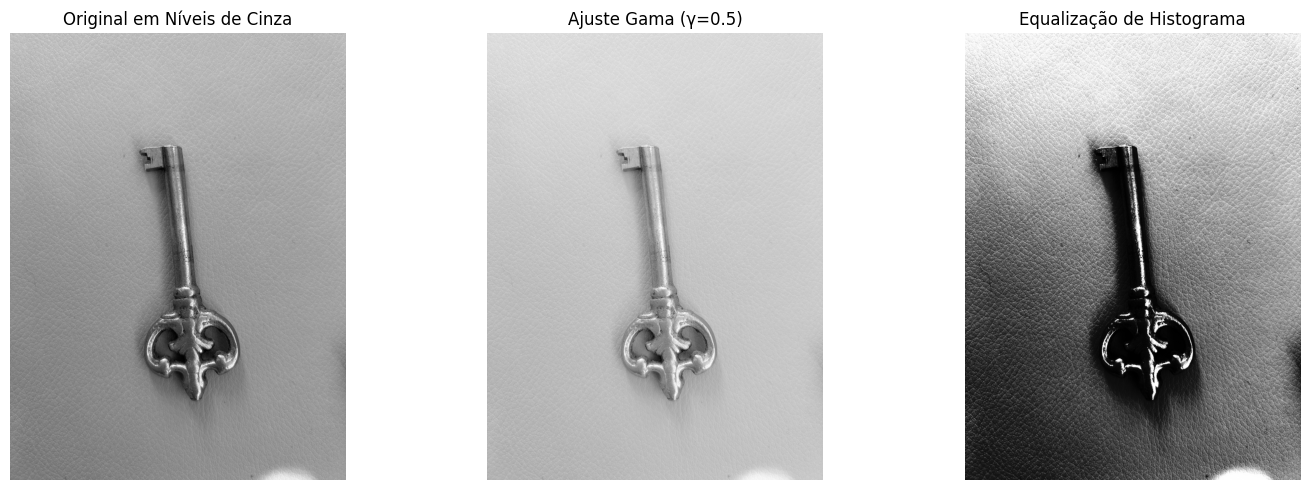


Resultados para: chave_i_n_01.jpg


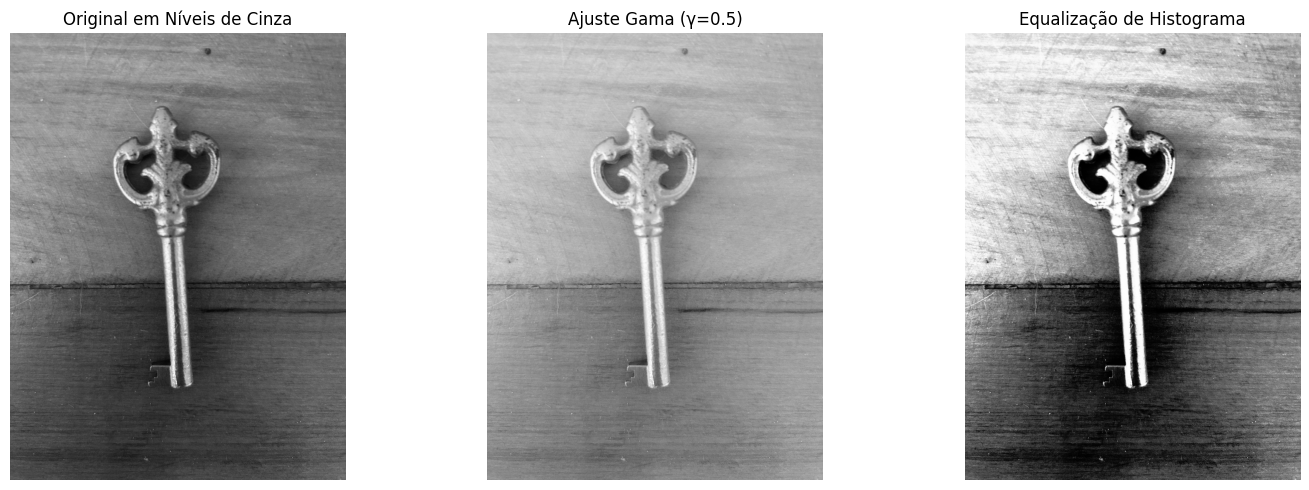


Resultados para: chave_o_d_01.jpg


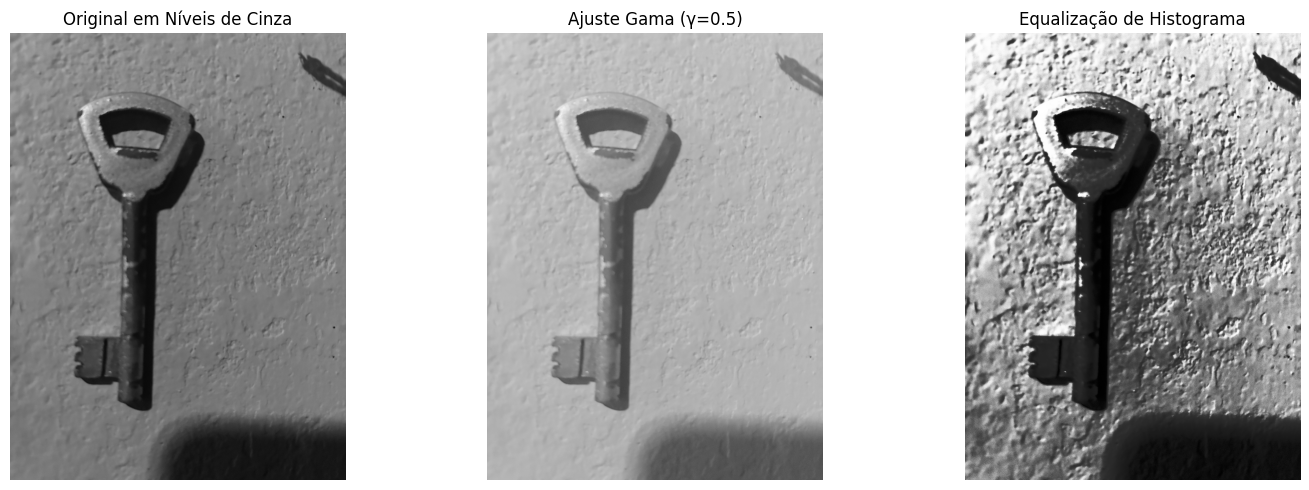


Resultados para: chave_o_n_01.jpg


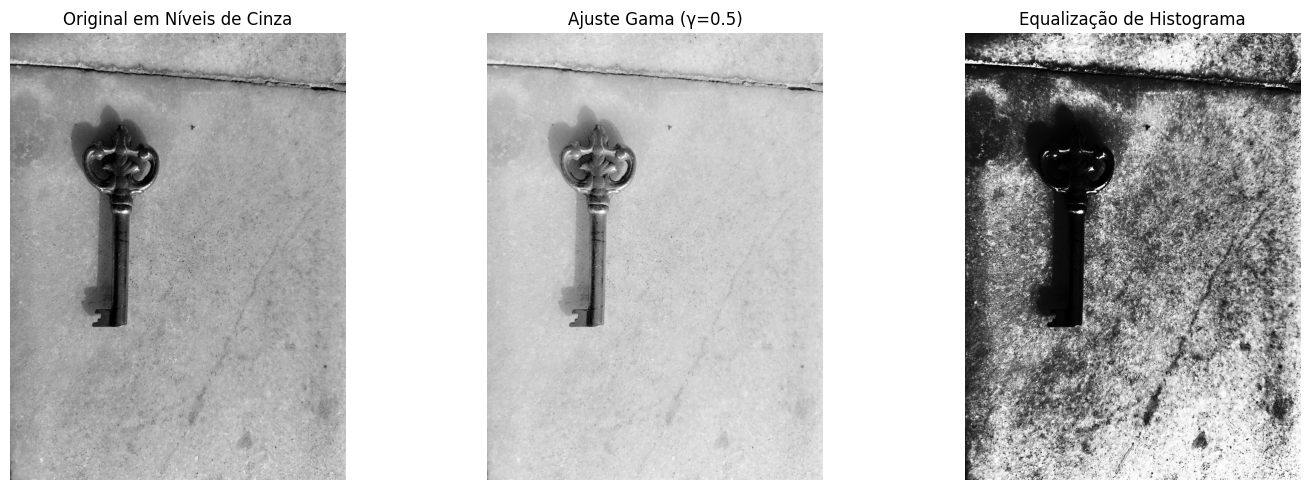



Processo finalizado!


In [1]:

# Passo 1: Importar as bibliotecas necessárias
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, exposure
from skimage.util import img_as_ubyte

# --- SEÇÃO DE CONFIGURAÇÃO ---
# Escolha a classe de objetos para analisar (use letra minúscula)
CLASSE_PARA_ANALISAR = 'chave' 

# Defina o valor do Gamma (valores < 1.0 clareiam a imagem, > 1.0 escurecem)
VALOR_GAMMA = 0.5 

# Pastas de entrada e saída
PASTA_CINZA = 'Imagens_Cinza'
PASTA_SAIDA = 'Imagens_Transformadas'
# --------------------------------

# Passo 2: Criar a pasta de destino para as imagens transformadas
print(f"Verificando/Criando pasta de destino: {PASTA_SAIDA}")
os.makedirs(PASTA_SAIDA, exist_ok=True)


# Passo 3: Encontrar as imagens da classe escolhida na pasta de níveis de cinza
caminho_busca = os.path.join(PASTA_CINZA, f'{CLASSE_PARA_ANALISAR}*.jpg')
lista_imagens_cinza = sorted(glob.glob(caminho_busca))

print(f"\nEncontradas {len(lista_imagens_cinza)} imagens da classe '{CLASSE_PARA_ANALISAR}'.")
print("Iniciando transformações...")

# Passo 4: Loop para processar cada imagem
for caminho_imagem in lista_imagens_cinza:
    # Carrega a imagem em níveis de cinza
    img_cinza = io.imread(caminho_imagem)
    
    # --- APLICAÇÃO DAS TRANSFORMADAS ---
    
    # 1. Ajuste Gama
    img_gamma = exposure.adjust_gamma(img_cinza, gamma=VALOR_GAMMA)
    
    # 2. Equalização de Histograma
    img_hist_eq = exposure.equalize_hist(img_cinza)
    # A equalização retorna valores float (0 a 1), então convertemos para 8-bit (0 a 255)
    img_hist_eq_8bit = img_as_ubyte(img_hist_eq)

    # --- SALVANDO AS NOVAS IMAGENS ---
    nome_base = os.path.basename(caminho_imagem).split('.')[0] # Pega o nome sem a extensão .jpg
    
    # Salva a imagem com ajuste gama
    nome_gamma = f"{nome_base}_gamma.jpg"
    caminho_gamma = os.path.join(PASTA_SAIDA, nome_gamma)
    io.imsave(caminho_gamma, img_gamma)
    
    # Salva a imagem equalizada
    nome_hist = f"{nome_base}_hist.jpg"
    caminho_hist = os.path.join(PASTA_SAIDA, nome_hist)
    io.imsave(caminho_hist, img_hist_eq_8bit)
    
    # --- VISUALIZAÇÃO DOS RESULTADOS ---
    print(f"\nResultados para: {os.path.basename(caminho_imagem)}")
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    ax = axes.ravel() # Transforma o array de eixos em uma lista
    
    ax[0].imshow(img_cinza, cmap='gray')
    ax[0].set_title("Original em Níveis de Cinza")
    ax[0].axis('off')
    
    ax[1].imshow(img_gamma, cmap='gray', vmin=0, vmax=255)
    ax[1].set_title(f"Ajuste Gama (γ={VALOR_GAMMA})")
    ax[1].axis('off')
    
    ax[2].imshow(img_hist_eq_8bit, cmap='gray')
    ax[2].set_title("Equalização de Histograma")
    ax[2].axis('off')
    
    plt.tight_layout()
    plt.show()

print("\n\nProcesso finalizado!")